# Predicting heart disease using machine learning

Using a plenty of Python-based machine learning and data science libraries in a join to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical features.

We're going to take the following list:
1. Problem defination
2. Data
3. Evalation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Defination

In a statement
> Given detail about patient, can we predict whether or not thay have heart disease?

## 2. Data

https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll sure about the project.

## 4. Features

**data dictionary**
<img src="inbox_3632459_a01747fb0158dc51c12bc0824c9c4ae4_data_dictionary2.png">

1. Age
2. Sex : 
* male : 1
* female : 0
3. chest pain type
* 1: typical angina
* 2: atypical angina
* 3: non-anginal pain
* 4: asymptomatic
4. trestbps-resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern.
5. chol-serum cholestoral in mg/dl

6. fbs
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg-resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping

12. vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

13. A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. Target : 0 No Heart disease
	     1 Heart disease

## Preparing the tools
We're giong to use pandas, NumPy and MatPlotlib for data analysis and manipulation.


In [1]:
# Import all the tools we need

# tools for data analysis and ploting libaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data exploration ()
The target here is finding morw about the data and become a subject matter export on the dataset

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. what is missing from the data and how do you solve it?
4. Where are the outliners and why should you care about them?
5. How can you add, change or reduce feature to get more out of your data?


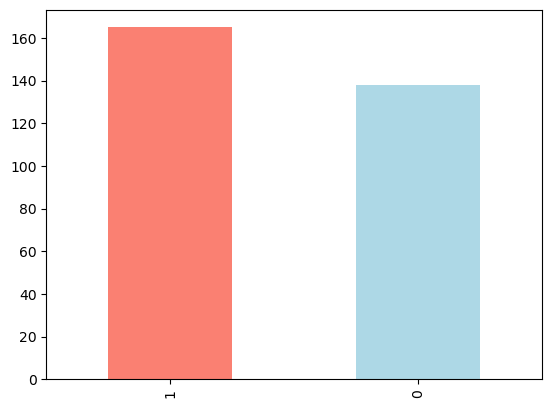

In [3]:
df["target"].value_counts().plot(kind="bar",color = ["salmon","lightblue"]);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.isna().sum() # ==> there no missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
### heart disease's frequency according to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

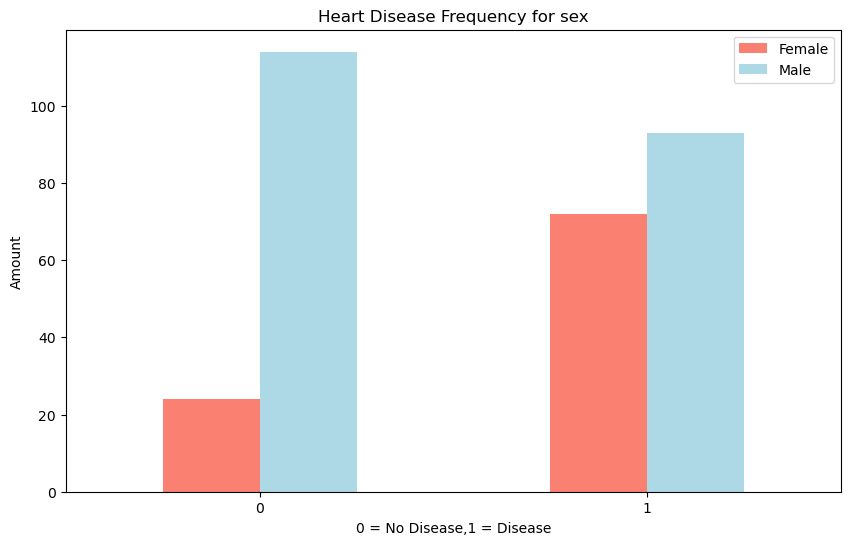

In [9]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   color=["salmon","lightblue"],
                                   figsize=(10,6));
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### Age vs .Max Heart Rate for heart disease

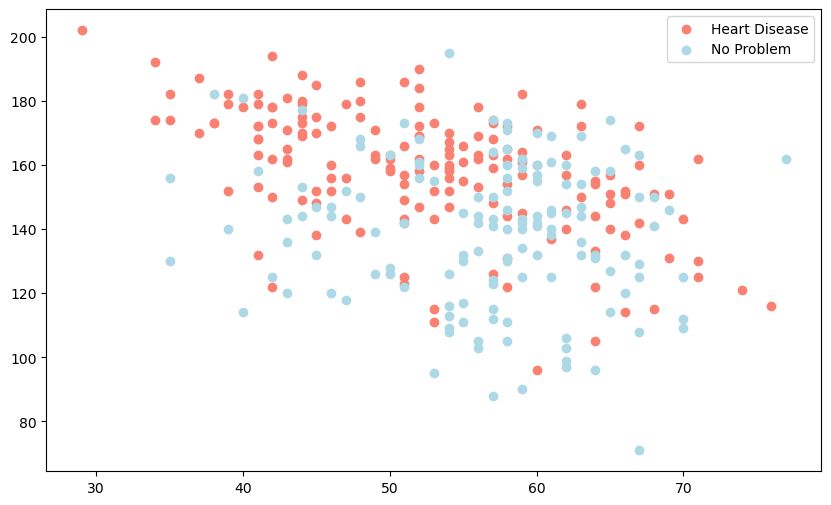

In [13]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c = "salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue")

# Add some helpful info
plt.legend(["Heart Disease","No Problem"])
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Ma ")

### Make heart disease frequency according to chest pain type
3. chest pain type
* 1: typical angina (đau ngực có liên quan đến tim)
* 2: atypical angina (đau ngực không liên quan đến tim)
* 3: non-anginal pain (đau thắt ngực)
* 4: asymptomatic (không triệu chứng)

In [29]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


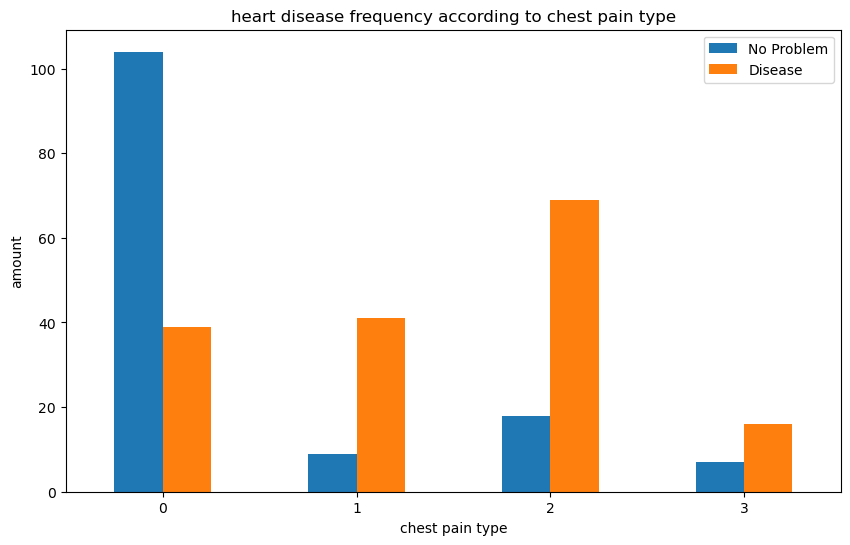

In [32]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6))
plt.title("heart disease frequency according to chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["No Problem","Disease"])
plt.xticks(rotation=0);

In [1]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'